In [1]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2023-02-04 03:02:13--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-02-04 03:02:13--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://pilotfiber.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-02-04 03:02:13--  http://pilotfiber.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving pilotfibe

In [2]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 3.1 MB/s eta 0:00:00


In [3]:
!pip install FinMind

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 KB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 783.1/783.1 KB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 KB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.7/232.7 KB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.4/386.

In [4]:
import pandas as pd
import numpy as np
import mplfinance as mpf 
from talib.abstract import *

In [5]:
from FinMind.data import DataLoader
dl = DataLoader()
data = dl.taiwan_stock_daily(stock_id='2330', 
                                 start_date='2022-07-01' ,
                                 end_date='2022-12-31')

In [6]:
data.columns=[ i.lower() for i in data.columns ]
data.index = pd.DatetimeIndex(data['date'])
data.rename(columns = {'max':'high', 'min':'low','trading_volume':'volume'}, inplace = True)

In [7]:
# 繪製圖表
class chart():
    #建構式
    def __init__(self,K_line):
        self.K_line = K_line #K線資料
        self.axlist = [] #子圖列表
    #方法
    def TA(self,data,panel,type='',marker='.',color=''):
        ax = mpf.make_addplot(data, panel=panel, type=type, marker=marker, color=color) 
        self.axlist.append(ax)
 
    def Show(self):
        color_set = mpf.make_marketcolors(up='red',down='green',
                                          edge='inherit',
                                          wick='inherit',
                                          volume='inherit',)
        style_set = mpf.make_mpf_style(marketcolors=color_set,
                                       figcolor='(0.82, 0.83, 0.85)',
                                       gridcolor='(0.82, 0.83, 0.85)',)
        mpf.plot(self.K_line, 
                 type='hollow_and_filled', 
                 style=style_set, 
                 volume=True, 
                 addplot=self.axlist,
                 update_width_config=dict(line_width=0.7,candle_width = 0.8),
                 figsize=(20, 8))

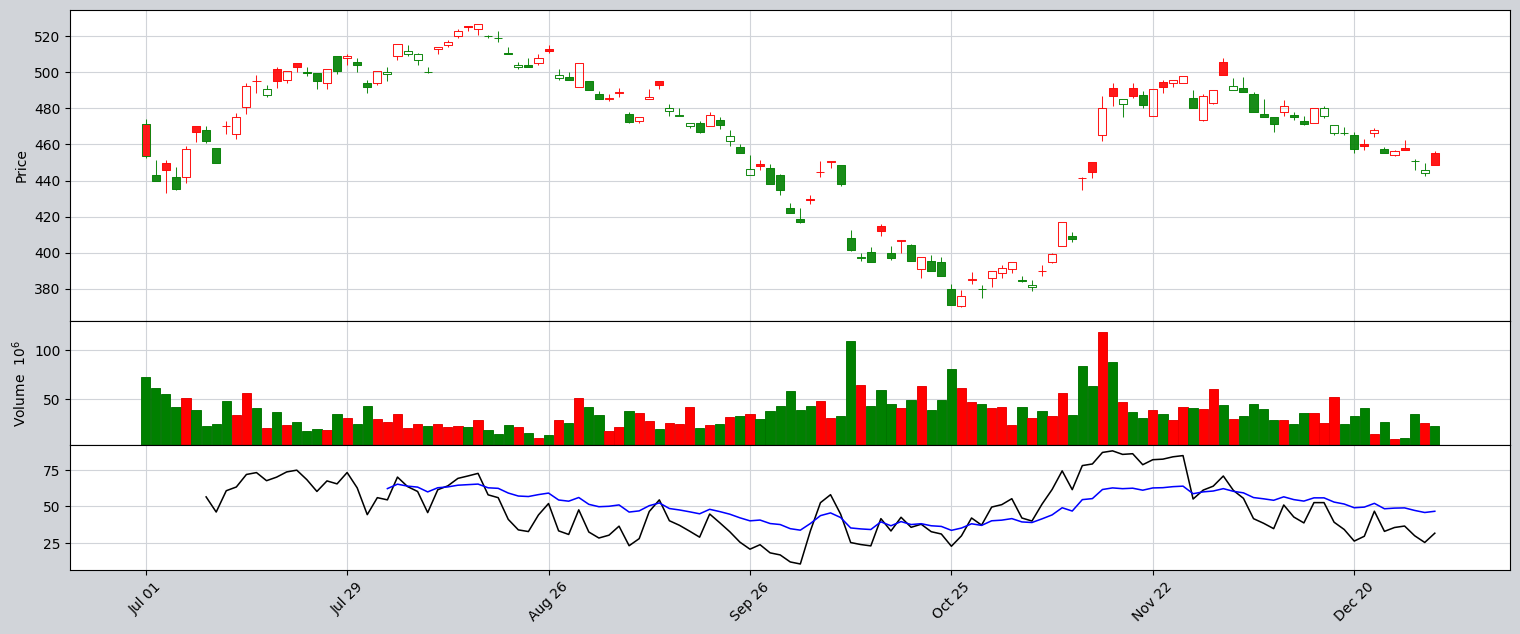

In [8]:
rsi_6=RSI(data,timeperiod = 6)
rsi_24=RSI(data,timeperiod = 24)

fin_chart = chart(data)
fin_chart.TA(rsi_6,panel=2,type="line",color="black")
fin_chart.TA(rsi_24,panel=2,type="line",color="blue")
fin_chart.Show()

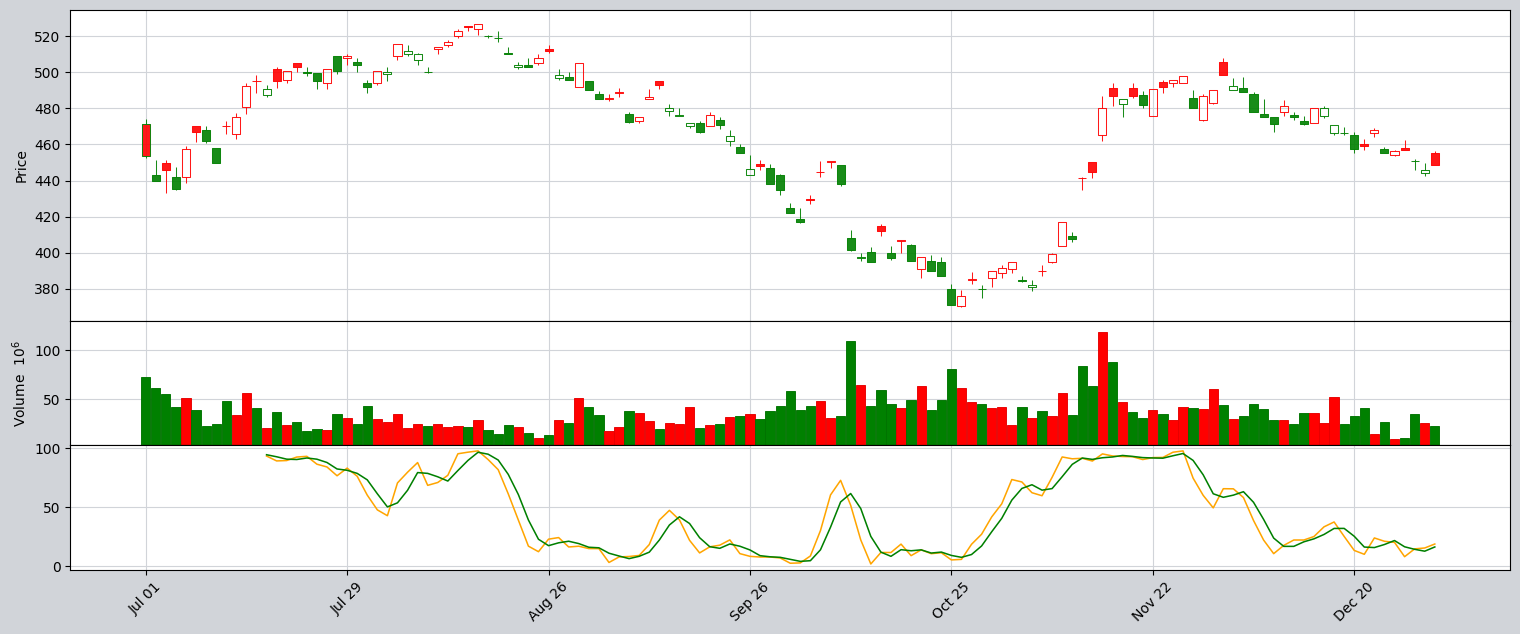

In [9]:
stoch=STOCH(data,fastk_period=9,slowk_period=3,slowd_period=3)

fin_chart = chart(data)
fin_chart.TA(stoch['slowk'],panel=2,type="line",color="orange")
fin_chart.TA(stoch['slowd'],panel=2,type="line",color="green")
fin_chart.Show()

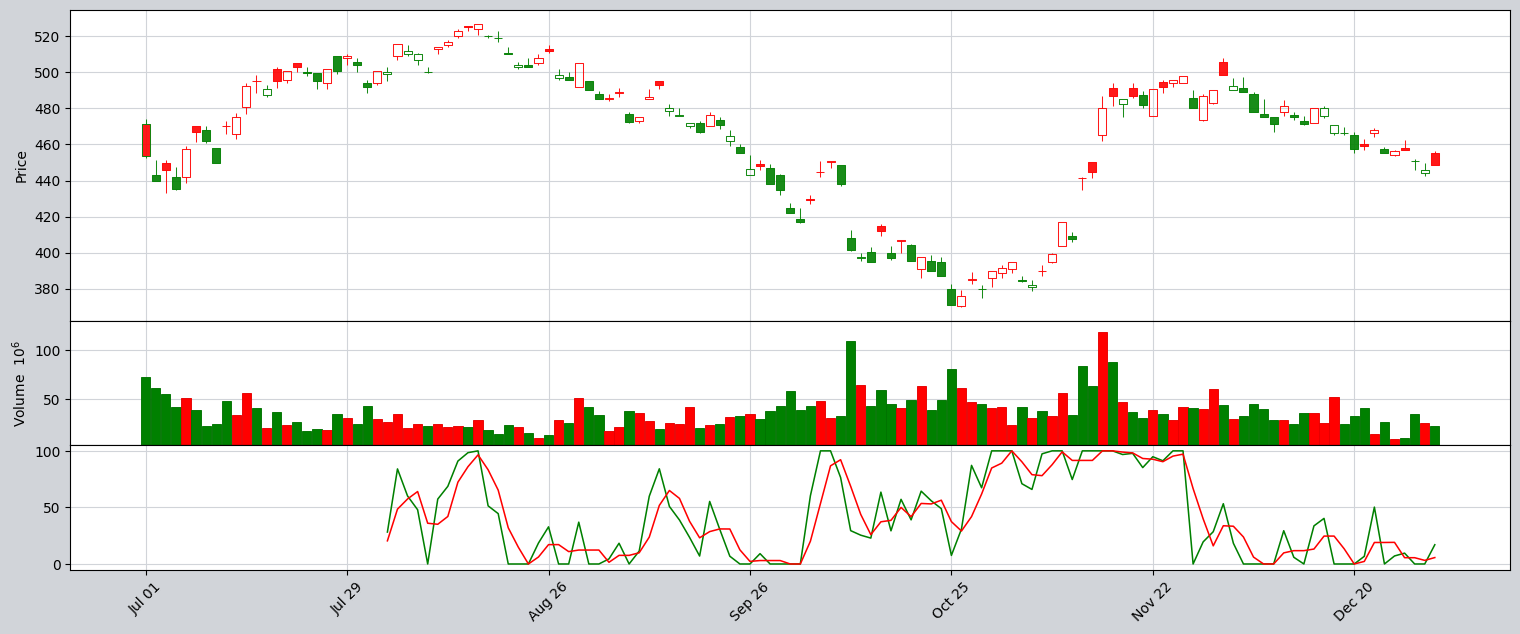

In [10]:
stochrsi=STOCHRSI(data,time_period=6,fastk_period=9)

fin_chart = chart(data)
fin_chart.TA(stochrsi['fastk'],panel=2,type="line",color="green")
fin_chart.TA(stochrsi['fastd'],panel=2,type="line",color="red")
fin_chart.Show()

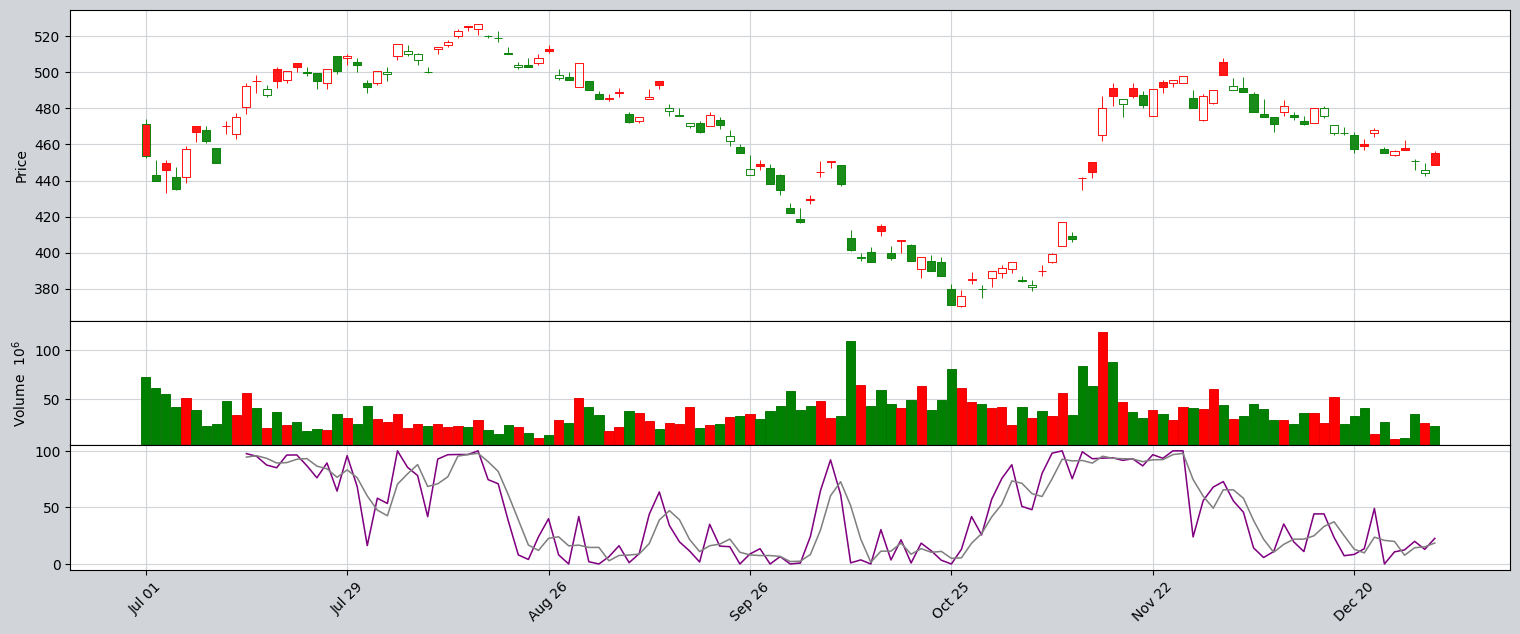

In [11]:
stochf=STOCHF(data,fastk_period=9,fastd_period=3)

fin_chart = chart(data)
fin_chart.TA(stochf['fastk'],panel=2,type="line",color="purple")
fin_chart.TA(stochf['fastd'],panel=2,type="line",color="gray")
fin_chart.Show()

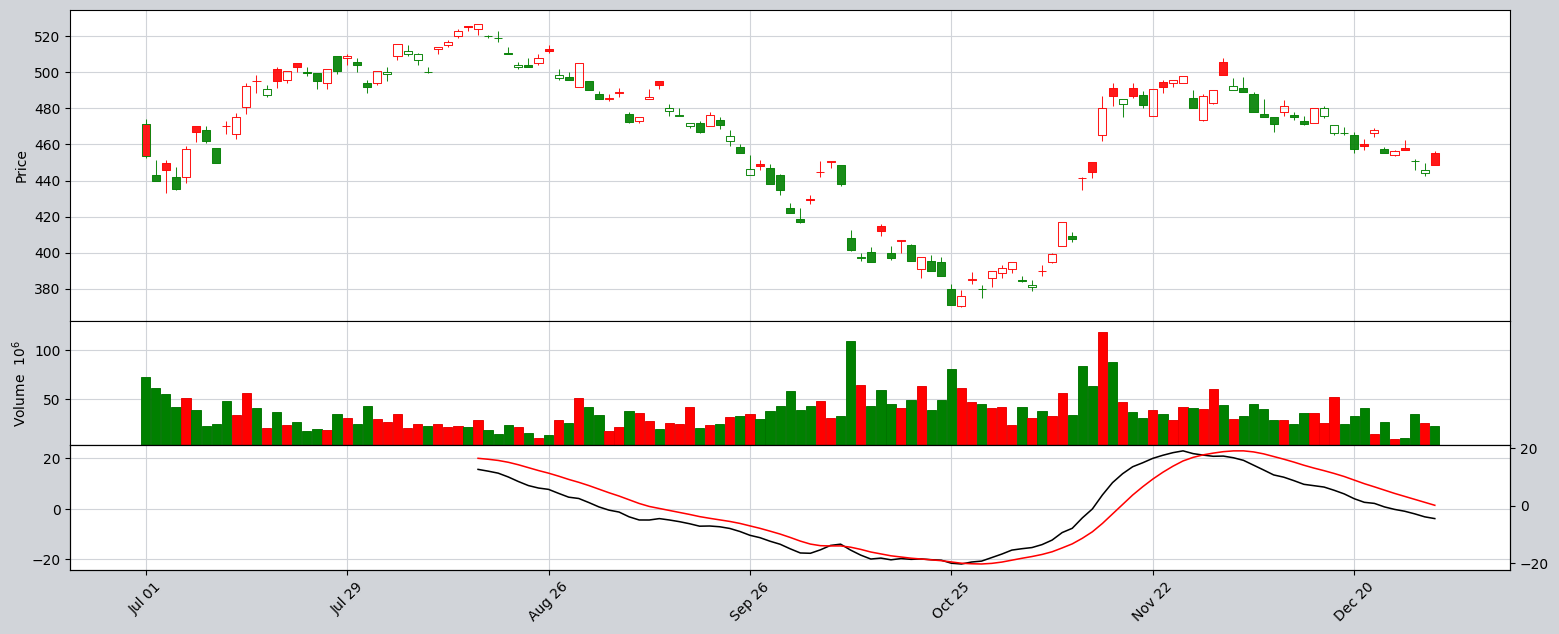

In [12]:
macd=MACD(data,fastperiod=12,slowperiod=26,signalperiod=9)
 
fin_chart = chart(data)
fin_chart.TA(macd['macd'],panel=2,type="line",color="black")
fin_chart.TA(macd['macdsignal'],panel=2,type="line",color="red")
fin_chart.Show()